In [4]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
full_data = pd.read_csv('/content/data.csv')
full_data.head()

Saving data.csv to data (3).csv


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [5]:
full_data.shape

(142193, 24)

In [6]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [7]:
full_data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
full_data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

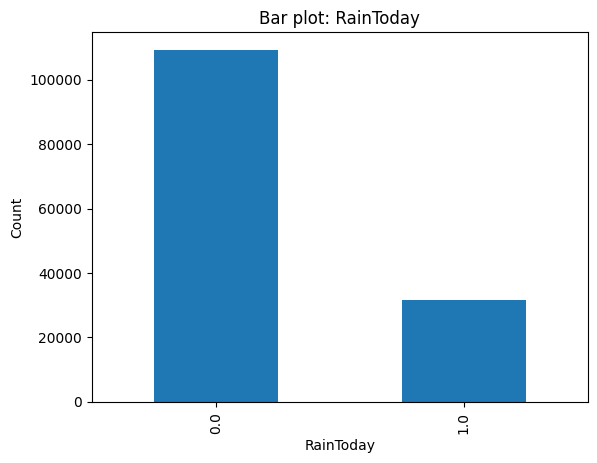

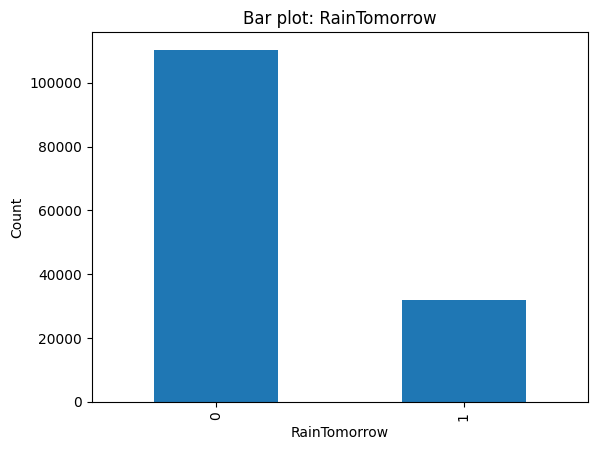

In [8]:
import matplotlib.pyplot as plt

# Plot bar plot of 'RainToday'
rain_today_counts = full_data['RainToday'].value_counts()
rain_today_counts.plot(kind='bar')
plt.xlabel('RainToday')
plt.ylabel('Count')
plt.title('Bar plot: RainToday')
plt.show()

# Plot bar plot of 'RainTomorrow'
rain_tomorrow_counts = full_data['RainTomorrow'].value_counts()
rain_tomorrow_counts.plot(kind='bar')
plt.xlabel('RainTomorrow')
plt.ylabel('Count')
plt.title('Bar plot: RainTomorrow')
plt.show()


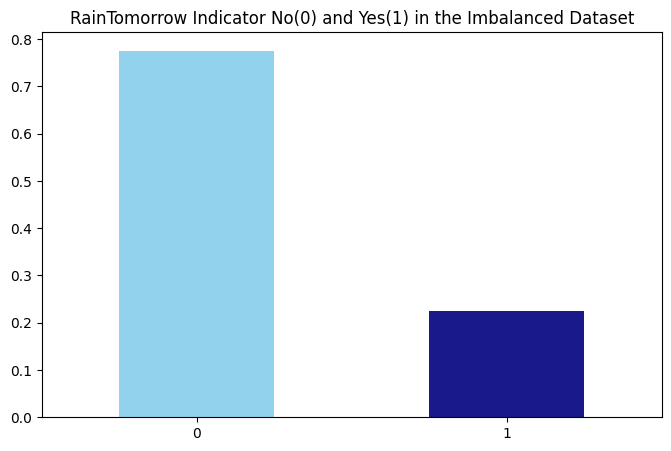

In [9]:

fig = plt.figure(figsize = (8,5))
full_data.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

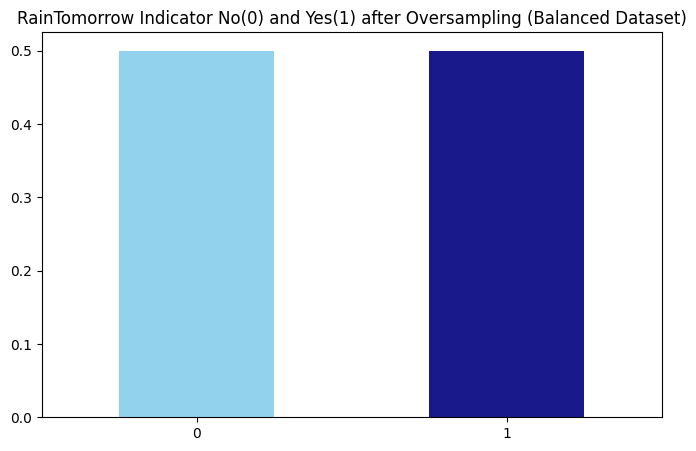

In [10]:
from sklearn.utils import resample

no = full_data[full_data.RainTomorrow == 0]
yes = full_data[full_data.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()


In [13]:
missing_data = full_data.isnull().sum()
print(missing_data)


Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64


<Axes: >

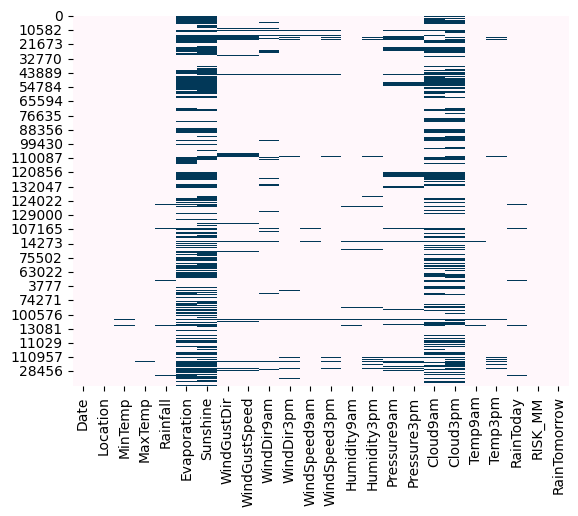

In [15]:
import seaborn as sns
sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')

In [16]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
Sunshine,104831,0.475140
Evaporation,95411,0.432444
Cloud3pm,85614,0.388040
Cloud9am,81339,0.368664


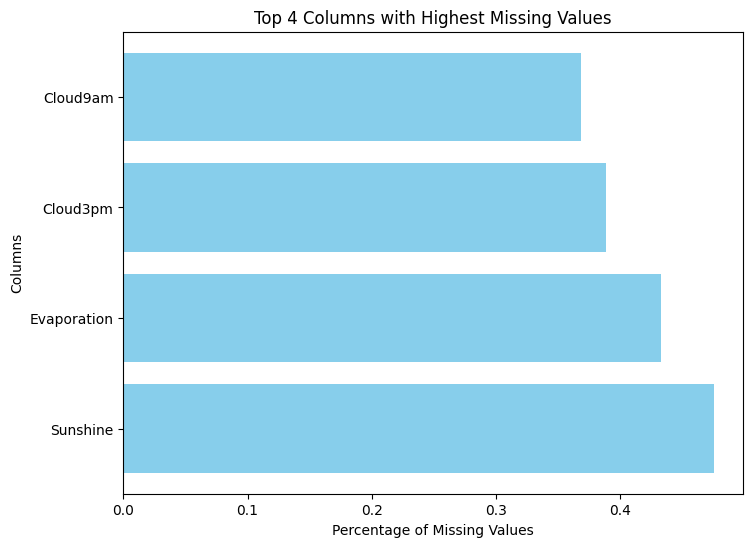

In [17]:
import matplotlib.pyplot as plt

# Plot the top N columns with the highest percentage of missing values
n = 4  # Number of columns to plot
top_missing = missing.head(n)

plt.figure(figsize=(8, 6))
plt.barh(top_missing.index, top_missing['Percent'], color='skyblue')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.title(f'Top {n} Columns with Highest Missing Values')
plt.show()


In [18]:
for column, percent in missing.iterrows():
    print(f"{column}: {percent['Percent']*100:.2f}%")

Sunshine: 47.51%
Evaporation: 43.24%
Cloud3pm: 38.80%
Cloud9am: 36.87%
Pressure3pm: 9.86%
Pressure9am: 9.85%
WindGustDir: 7.02%
WindGustSpeed: 6.96%
WindDir9am: 6.68%
WindDir3pm: 2.92%
Humidity3pm: 2.73%
Temp3pm: 2.07%
WindSpeed3pm: 1.97%
Humidity9am: 1.44%
RainToday: 1.42%
Rainfall: 1.42%
WindSpeed9am: 1.00%
Temp9am: 0.75%
MinTemp: 0.49%
MaxTemp: 0.21%
RISK_MM: 0.00%
Date: 0.00%
Location: 0.00%
RainTomorrow: 0.00%


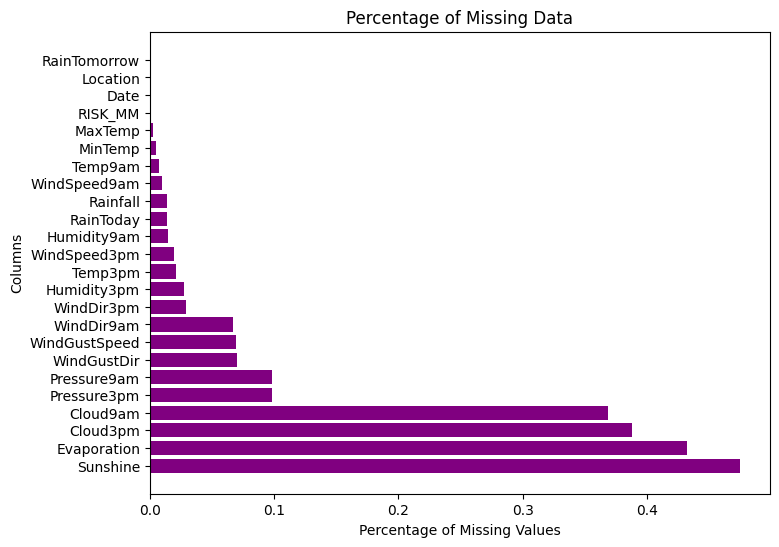

In [19]:
import matplotlib.pyplot as plt

# Plot the percentage of missing data
plt.figure(figsize=(8, 6))
plt.barh(missing.index, missing['Percent'], color='purple')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.title('Percentage of Missing Data')
plt.show()


In [20]:
for column, percent in missing.iterrows():
    print(f"{column}: {percent['Percent']*100:.2f}%")


Sunshine: 47.51%
Evaporation: 43.24%
Cloud3pm: 38.80%
Cloud9am: 36.87%
Pressure3pm: 9.86%
Pressure9am: 9.85%
WindGustDir: 7.02%
WindGustSpeed: 6.96%
WindDir9am: 6.68%
WindDir3pm: 2.92%
Humidity3pm: 2.73%
Temp3pm: 2.07%
WindSpeed3pm: 1.97%
Humidity9am: 1.44%
RainToday: 1.42%
Rainfall: 1.42%
WindSpeed9am: 1.00%
Temp9am: 0.75%
MinTemp: 0.49%
MaxTemp: 0.21%
RISK_MM: 0.00%
Date: 0.00%
Location: 0.00%
RainTomorrow: 0.00%


In [21]:
oversampled.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [22]:
oversampled['Date'] = oversampled['Date'].fillna(oversampled['Date'].mode()[0])
oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

In [23]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [24]:
import warnings
warnings.filterwarnings("ignore")
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True)
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

In [25]:
# Calculate the IQR for each numeric column
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Define the threshold for outliers
threshold = 1.5

# Identify rows with outliers
outliers = ((MiceImputed < (Q1 - threshold * IQR)) | (MiceImputed > (Q3 + threshold * IQR))).any(axis=1)

# Remove or handle outliers
MiceImputed_no_outliers = MiceImputed[~outliers]

MiceImputed.shape


Date             1535.000000
Location           25.000000
MinTemp             9.300000
MaxTemp            10.200000
Rainfall            2.400000
Evaporation         4.119679
Sunshine            5.947404
WindGustDir         9.000000
WindGustSpeed      19.000000
WindDir9am          8.000000
WindDir3pm          8.000000
WindSpeed9am       13.000000
WindSpeed3pm       11.000000
Humidity9am        26.000000
Humidity3pm        30.000000
Pressure9am         8.800000
Pressure3pm         8.800000
Cloud9am            4.000000
Cloud3pm            3.681346
Temp9am             9.300000
Temp3pm             9.800000
RainToday           1.000000
RISK_MM             5.200000
RainTomorrow        1.000000
dtype: float64


(220632, 24)

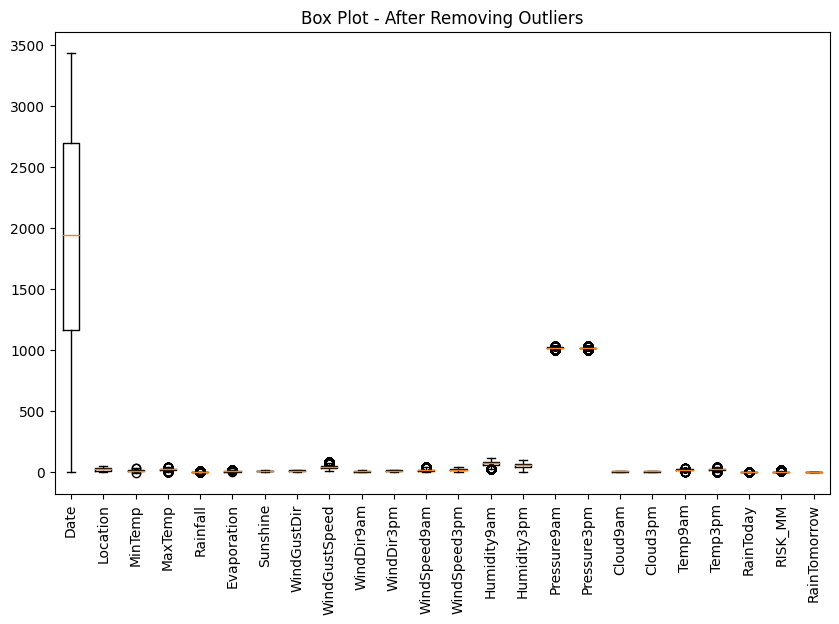

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot(MiceImputed_no_outliers.values)
plt.title('Box Plot - After Removing Outliers')
plt.xticks(range(1, len(MiceImputed_no_outliers.columns) + 1), MiceImputed_no_outliers.columns, rotation=90)
plt.show()


<Axes: >

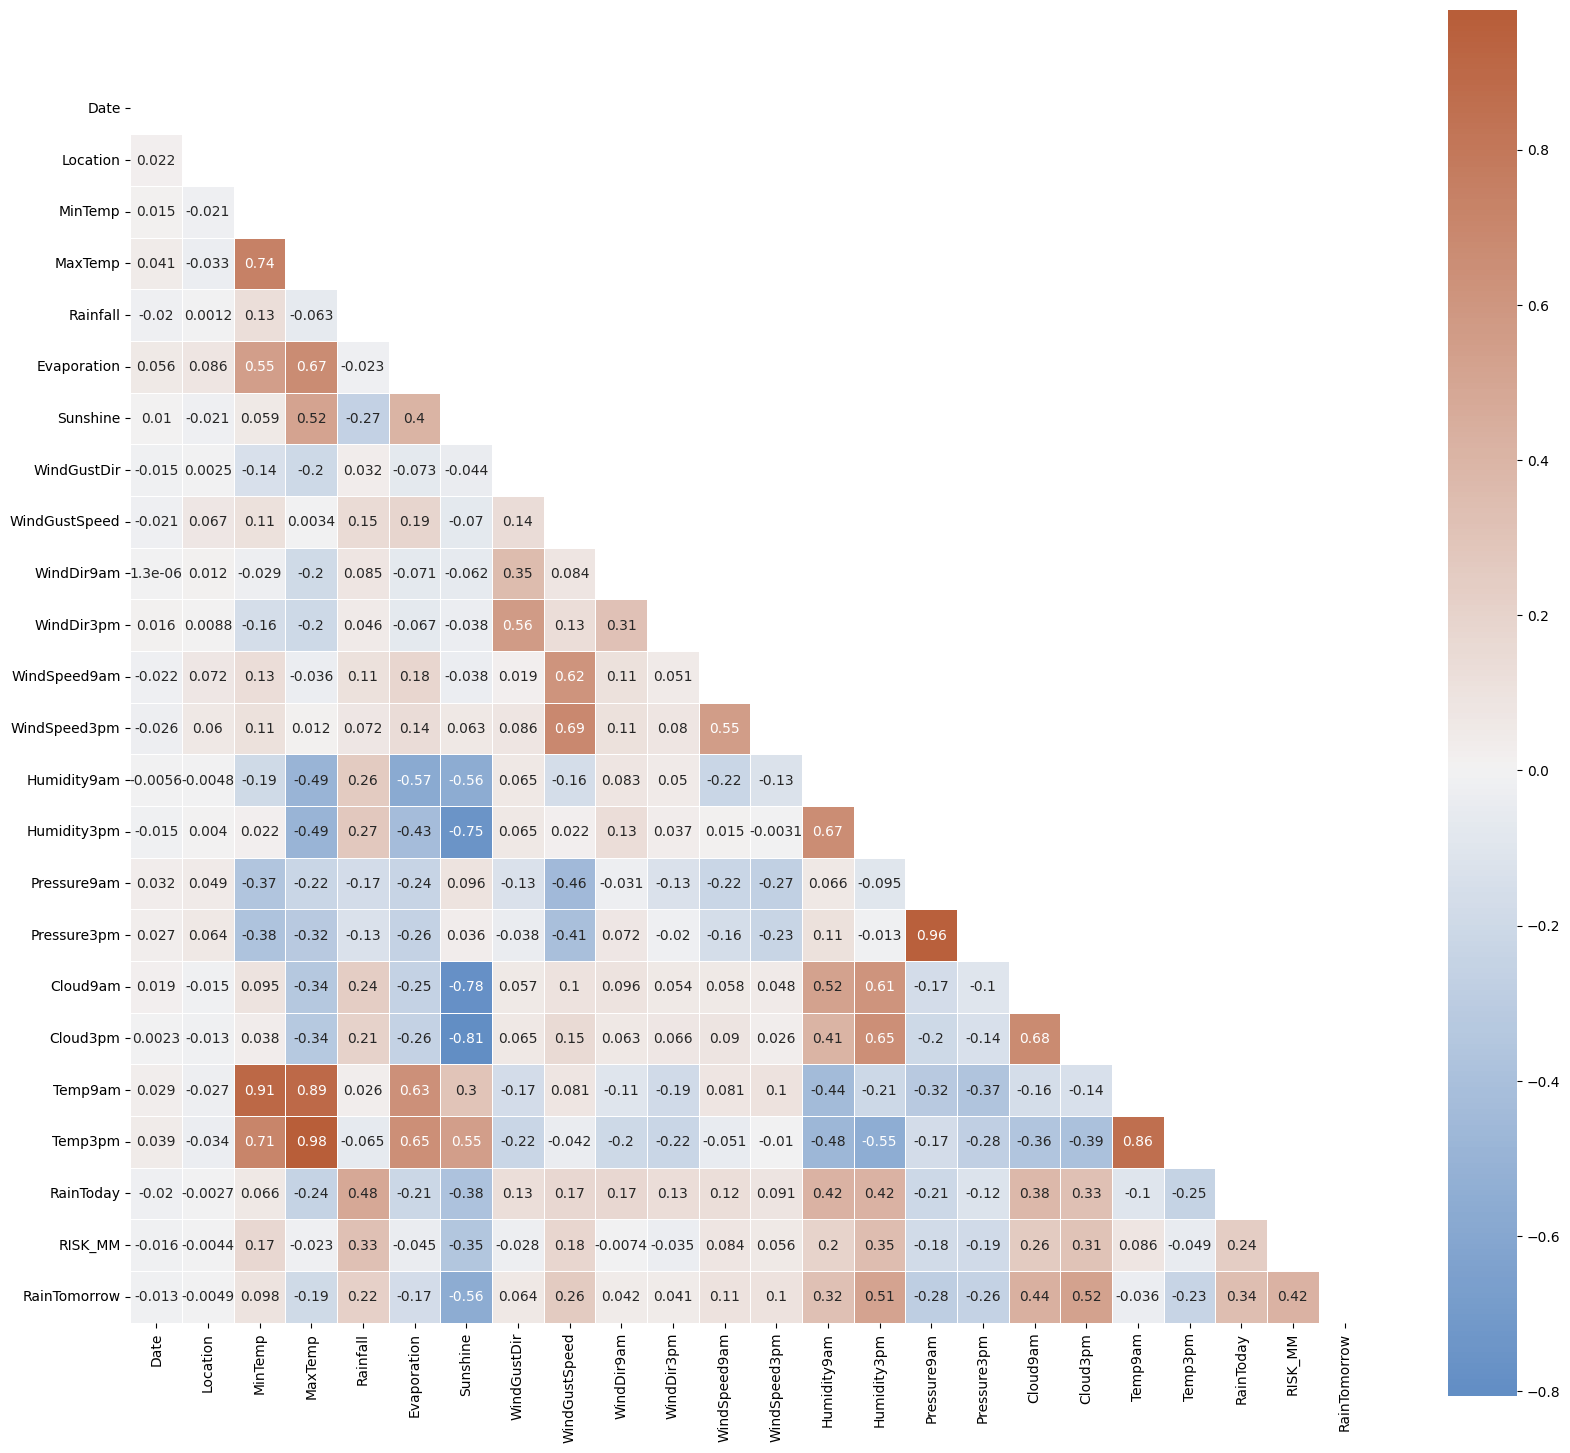

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

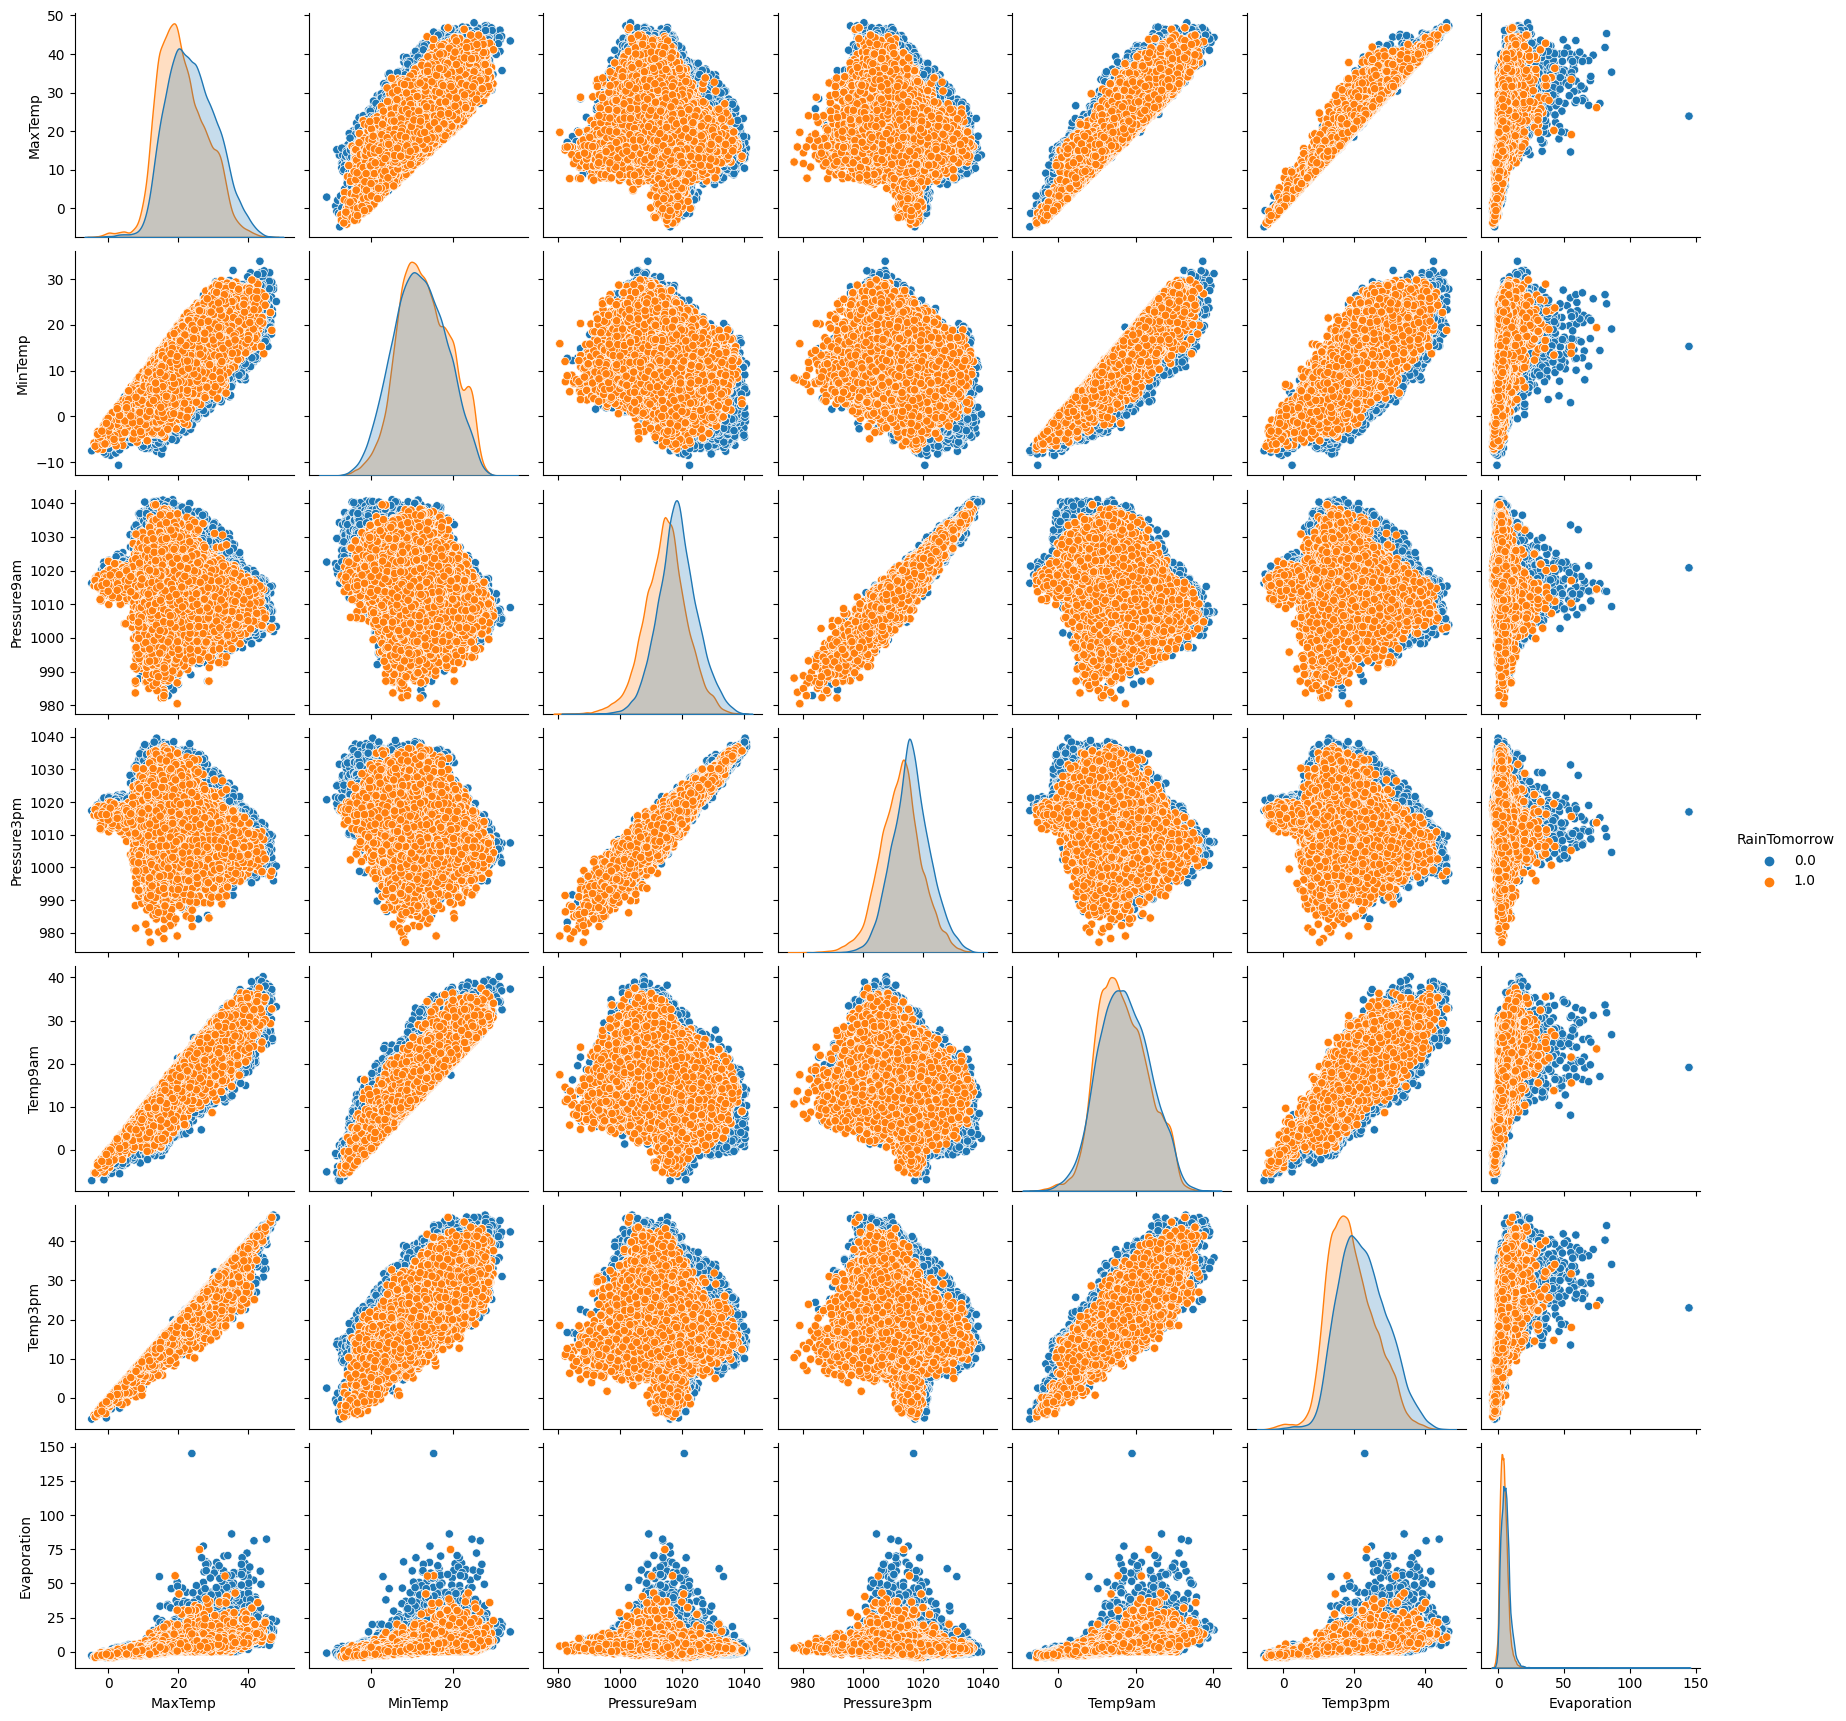

In [28]:

sns.pairplot( data=MiceImputed, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow' )



In [29]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)

In [30]:
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday',
       'RISK_MM'],
      dtype='object')


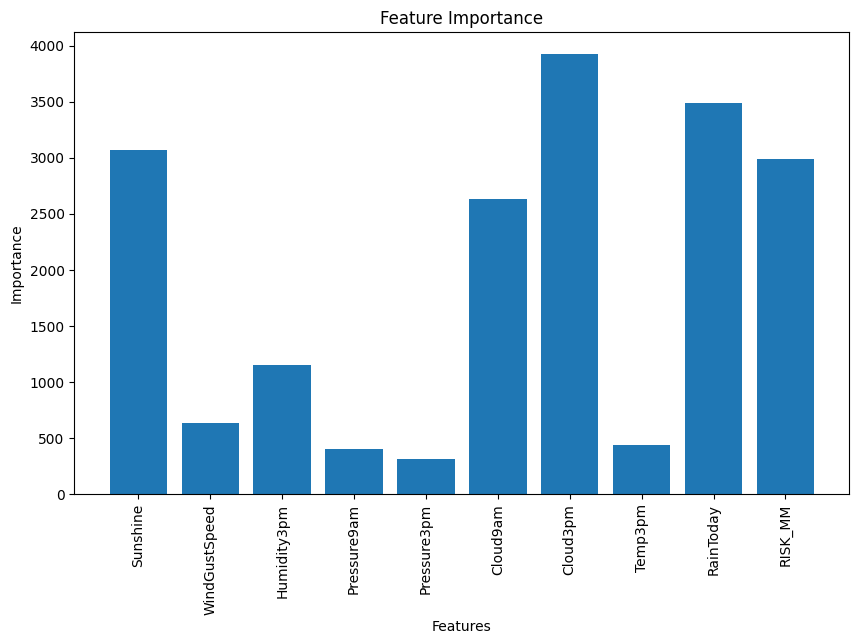

In [31]:
import matplotlib.pyplot as plt

# Get the scores/importance values from the feature selection
scores = selector.scores_

# Get the selected feature names
selected_features = X.columns[selector.get_support(indices=True)]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), scores[selector.get_support()])
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(range(len(selected_features)), selected_features, rotation=90)
plt.show()


In [32]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Sunshine', 'Cloud3pm', 'RISK_MM']
[0.00180446 0.00184234 0.00259297 0.00316517 0.01842542 0.00269217
 0.0775792  0.00121055 0.00947036 0.00133618 0.0016047  0.00131799
 0.00196125 0.01095036 0.03630843 0.00942357 0.01433788 0.02523762
 0.05110783 0.0024308  0.00397175 0.00934568 0.71188333]


In [33]:
features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
                       'RainToday']]
target = MiceImputed['RainTomorrow']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [34]:
def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

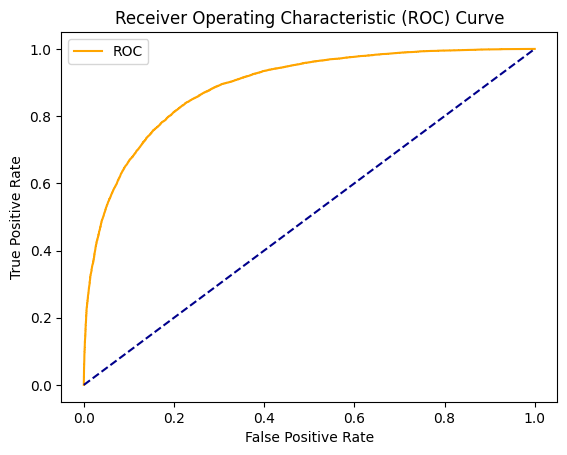

In [35]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression  # Example classifier, replace with your choice

# Train a classification model
model = LogisticRegression()  # Replace with your chosen classifier
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate and true positive rate
fper, tper, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fper, tper)

# Plot the ROC curve
plot_roc_cur(fper, tper)


Accuracy = 0.8050146850864789
ROC Area under Curve = 0.805039737453916
Cohen's Kappa = 0.6100470056991374
Time taken = 4.293061256408691
              precision    recall  f1-score   support

         0.0    0.79882   0.81390   0.80629     27501
         1.0    0.81141   0.79618   0.80372     27657

    accuracy                        0.80501     55158
   macro avg    0.80512   0.80504   0.80501     55158
weighted avg    0.80513   0.80501   0.80500     55158



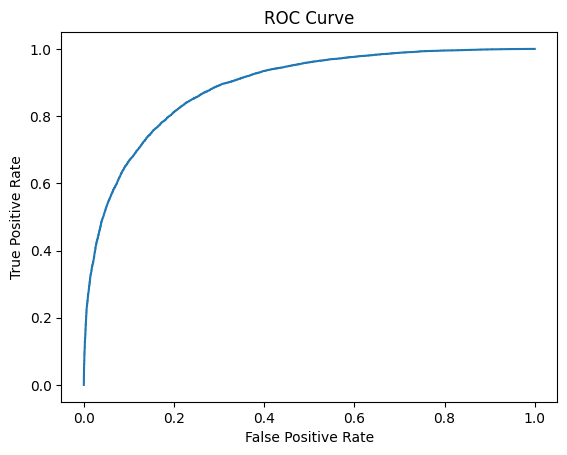

Confusion matrix, without normalization
Accuracy = 0.8666195293520432
ROC Area under Curve = 0.8665334987138236
Cohen's Kappa = 0.733191586808682
Time taken = 0.7531166076660156
              precision    recall  f1-score   support

         0.0    0.88972   0.83612   0.86209     27501
         1.0    0.84625   0.89695   0.87086     27657

    accuracy                        0.86662     55158
   macro avg    0.86799   0.86653   0.86648     55158
weighted avg    0.86793   0.86662   0.86649     55158



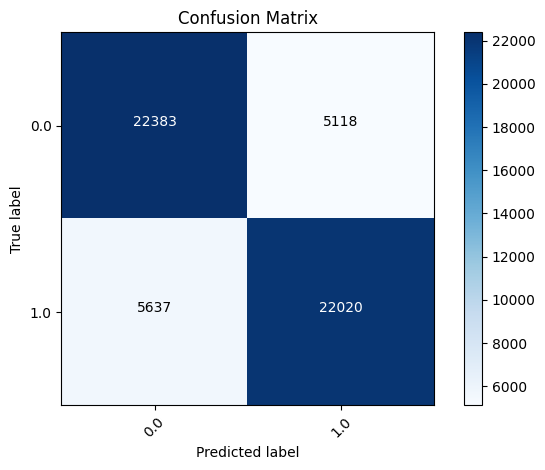

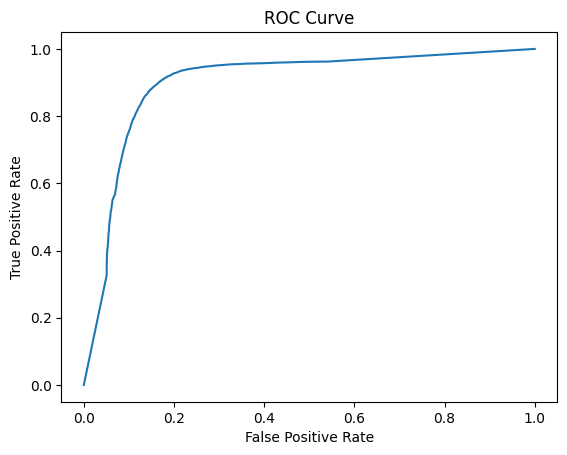

Confusion matrix, without normalization
Accuracy = 0.8937053555241307
ROC Area under Curve = 0.8936717401423054
Cohen's Kappa = 0.7873950784904907
Time taken = 484.4572079181671
              precision    recall  f1-score   support

         0.0    0.90276   0.88179   0.89215     27501
         1.0    0.88511   0.90556   0.89522     27657

    accuracy                        0.89371     55158
   macro avg    0.89393   0.89367   0.89368     55158
weighted avg    0.89391   0.89371   0.89369     55158



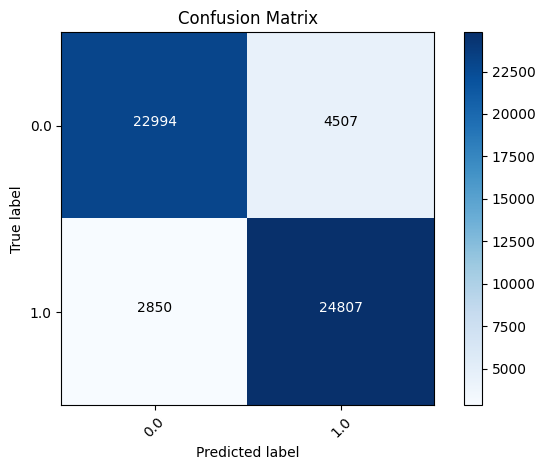

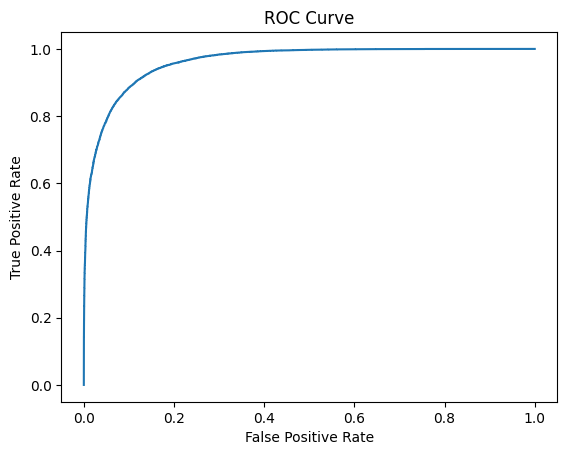

Confusion matrix, without normalization
Accuracy = 0.9234562529460821
ROC Area under Curve = 0.9233814961038466
Cohen's Kappa = 0.8468885765844757
Time taken = 48.85527777671814
              precision    recall  f1-score   support

         0.0    0.94673   0.89695   0.92117     27501
         1.0    0.90262   0.94981   0.92562     27657

    accuracy                        0.92346     55158
   macro avg    0.92467   0.92338   0.92339     55158
weighted avg    0.92461   0.92346   0.92340     55158



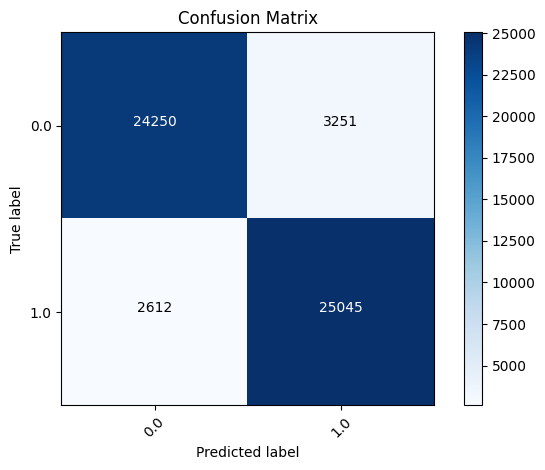

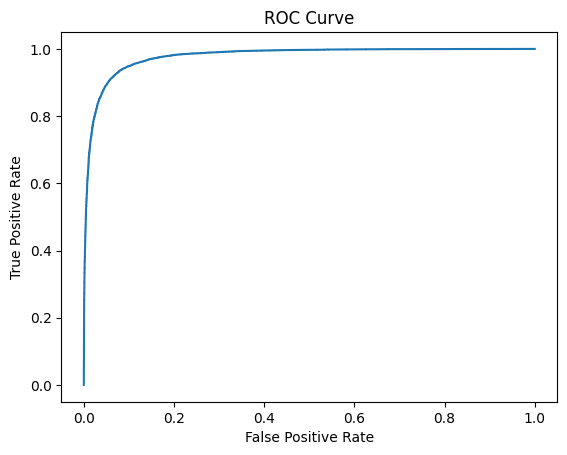

Confusion matrix, without normalization
Accuracy = 0.8728017694622721
ROC Area under Curve = 0.8727177880255684
Cohen's Kappa = 0.7455592851796542
Time taken = 9.703380107879639
              precision    recall  f1-score   support

         0.0    0.89572   0.84302   0.86857     27501
         1.0    0.85254   0.90241   0.87677     27657

    accuracy                        0.87280     55158
   macro avg    0.87413   0.87272   0.87267     55158
weighted avg    0.87407   0.87280   0.87268     55158



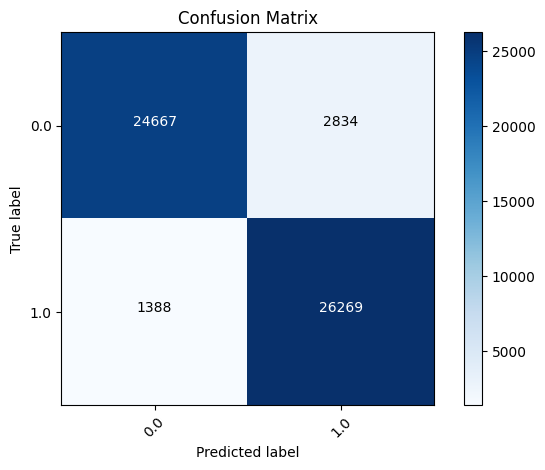

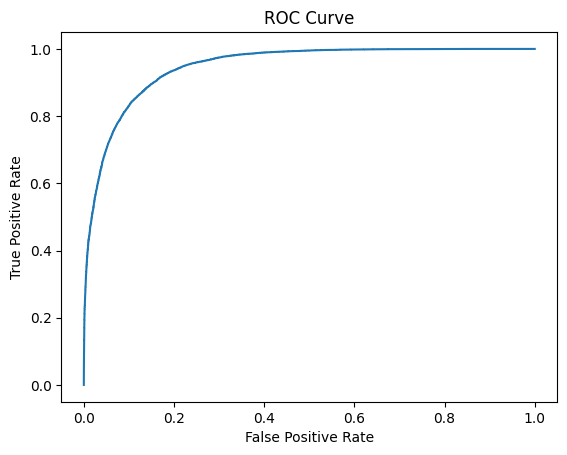

Confusion matrix, without normalization


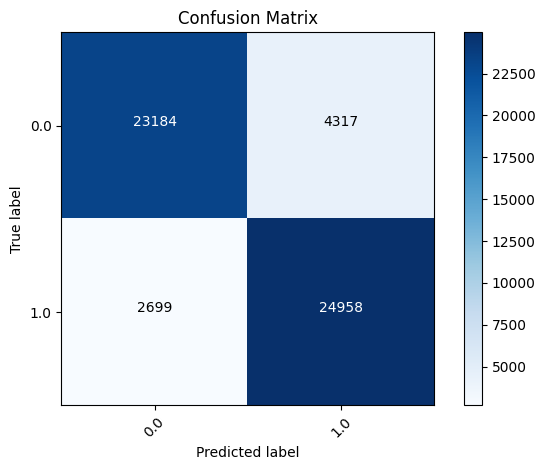

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, roc_curve, classification_report, confusion_matrix
import time
import itertools
import numpy as np

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0 = time.time()
    if not verbose:
        model.fit(X_train, y_train, verbose=0)
    else:
        model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time() - t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test, y_pred, digits=5))

    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    fper, tper, thresholds = roc_curve(y_test, probs)
    plt.figure()
    plt.plot(fper, tper)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, classes=model.classes_)

    return model, accuracy, roc_auc, coh_kap, time_taken


def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Logistic Regression
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver': 'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

# Neural Network
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30, 30, 30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 500}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

# Random Forest
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

# Light GBM
import lightgbm as lgb

params_lgb = {'colsample_bytree': 0.95,
              'max_depth': 16,
              'min_split_gain': 0.1,
              'n_estimators': 200,
              'num_leaves': 50,
              'reg_alpha': 1.2,
              'reg_lambda': 1.2,
              'subsample': 0.95,
              'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)



In [70]:
# Create a list of accuracies
accuracies = [accuracy_lr, accuracy_dt, accuracy_nn, accuracy_rf, accuracy_lgb]

# Get the index of the model with the highest accuracy
best_model_index = np.argmax(accuracies)

# Get the corresponding model
best_model = [model_lr, model_dt, model_nn, model_rf, model_lgb][best_model_index]

# Predict using the best model
final_prediction = best_model.predict(X_test)

# Convert the prediction to integers
final_prediction = final_prediction.astype(int)

# Convert the prediction to "Rain" or "No Rain"
prediction_labels = ["No Rain", "Rain"]
final_output = np.take(prediction_labels, final_prediction)

# Print the final output
print("Final Output: ", final_output)


Final Output:  ['Rain' 'No Rain' 'Rain' ... 'No Rain' 'No Rain' 'Rain']


In [71]:
from scipy.stats import mode

# Create an array of model predictions
predictions = np.array([model_lr.predict(X_test), model_dt.predict(X_test),
                        model_nn.predict(X_test), model_rf.predict(X_test),
                        model_lgb.predict(X_test)])

# Calculate the mode of the predictions
final_prediction, _ = mode(predictions)

# Convert the mode prediction to "Rain" or "No Rain"
final_output = np.take(prediction_labels, final_prediction.astype(int))

# Print the final output
print("Final Output: ", final_output)


Final Output:  [['Rain' 'No Rain' 'Rain' ... 'No Rain' 'No Rain' 'Rain']]


In [72]:
# Create a list of accuracies
accuracies = [accuracy_lr, accuracy_dt, accuracy_nn, accuracy_rf, accuracy_lgb]

# Create a list of model names
model_names = ['Logistic Regression', 'Decision Tree', 'Neural Network', 'Random Forest', 'LightGBM']

# Get the index of the model with the highest accuracy
best_model_index = np.argmax(accuracies)

# Get the corresponding model name and accuracy
best_model_name = model_names[best_model_index]
best_accuracy = accuracies[best_model_index]

# Print the final decision
print("Best Model: ", best_model_name)
print("Accuracy: ", best_accuracy)


Best Model:  Random Forest
Accuracy:  0.9234562529460821


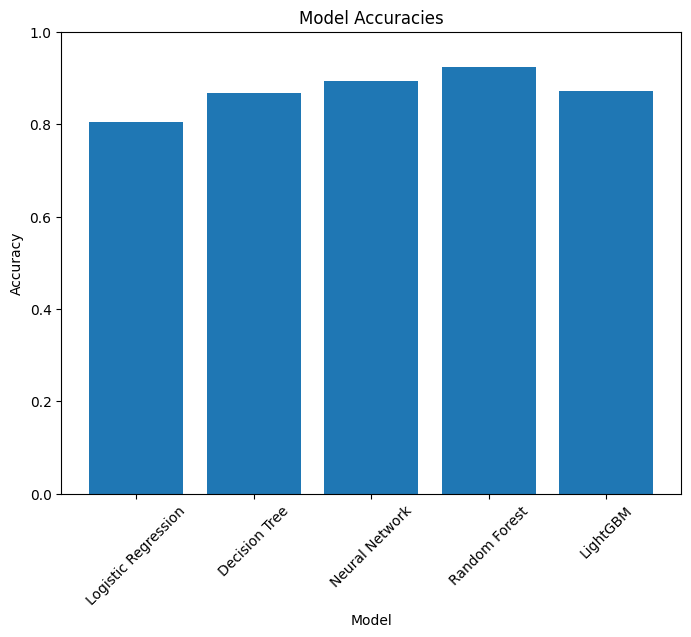

In [73]:
import matplotlib.pyplot as plt

# Create a list of accuracies
accuracies = [accuracy_lr, accuracy_dt, accuracy_nn, accuracy_rf, accuracy_lgb]

# Create a list of model names
model_names = ['Logistic Regression', 'Decision Tree', 'Neural Network', 'Random Forest', 'LightGBM']

# Plot the accuracies
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim([0, 1])  # Set the y-axis limits
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


In [74]:
# Predict using the best model
final_prediction = best_model.predict_proba(X_test)[:, 1]  # Get the probabilities for the "Rain" class

# Threshold the probabilities to make a binary decision
threshold = 0.5  # Adjust this threshold based on your preference
binary_prediction = (final_prediction > threshold).astype(int)

# Convert the binary prediction to "Rain" or "No Rain"
final_output = np.take(prediction_labels, binary_prediction)

# Print the final output
print("Final Output: ", final_output)


Final Output:  ['Rain' 'No Rain' 'Rain' ... 'No Rain' 'No Rain' 'Rain']


In [75]:
# Create a list of accuracies
accuracies = [accuracy_lr, accuracy_dt, accuracy_nn, accuracy_rf, accuracy_lgb]

# Get the index of the model with the highest accuracy
best_model_index = np.argmax(accuracies)

# Get the corresponding model
best_model = [model_lr, model_dt, model_nn, model_rf, model_lgb][best_model_index]

# Predict using the best model
final_prediction = best_model.predict(X_test)

# Convert the prediction to integers
final_prediction = final_prediction.astype(int)

# Convert the prediction to "Rain" or "No Rain"
prediction_labels = ["No Rain", "Rain"]
final_output = np.take(prediction_labels, final_prediction)

# Print the final output
print("Final Output: ", final_output)

# Get the predicted probabilities for the "Rain" class
final_probabilities = best_model.predict_proba(X_test)[:, 1]

# Threshold the probabilities to make a binary decision
threshold = 0.5  # Adjust this threshold based on your preference
binary_prediction = (final_probabilities > threshold).astype(int)

# Convert the binary prediction to "Rain" or "No Rain"
binary_output = np.take(prediction_labels, binary_prediction)

# Print the binary output
print("Binary Output: ", binary_output)

# Determine the majority vote
majority_vote = np.bincount(final_prediction).argmax()
majority_output = prediction_labels[majority_vote]

# Print the majority vote
print("Majority Vote: ", majority_output)


Final Output:  ['Rain' 'No Rain' 'Rain' ... 'No Rain' 'No Rain' 'Rain']
Binary Output:  ['Rain' 'No Rain' 'Rain' ... 'No Rain' 'No Rain' 'Rain']
Majority Vote:  Rain
